<pre>
classification confusion matrix
|----------------------------------------------------------------------------|
|             |                     Predicted Class                          |
|----------------------------------------------------------------------------|
| Actual Class|             C0               |             C1                |
|----------------------------------------------------------------------------|
|      C0     | n0,0 = number of correctly   | n0,1 = number of C0 cases     | 
|             |  classified C0 cases         |  incorrectly classified as C1 | 
|----------------------------------------------------------------------------|
|      C1     | n1,0 = number of C1 cases in-| n1,1 = number of correctly    |
|             |  coreectly classified as C0  |  classified C1 cases          |
|----------------------------------------------------------------------------|

### Loading Data

In [1]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
diabetes = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [2]:
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
# remove the first row (column names)
diabetes = diabetes.drop(diabetes.index[0])

In [4]:
#split dataset in features and target variable
diabetes['skin'].astype('int') #skin is stored in string, so you should convert it to int or not use it.
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'skin']
X = diabetes[feature_cols] # Features
y = diabetes.label # Target variable

### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [5]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
(X_train['skin'])

763     0
128    36
565     0
376    43
664    46
       ..
764    48
193     0
630    22
560     0
685     0
Name: skin, Length: 576, dtype: object

In [7]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

### Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [8]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

In [9]:
# using decision tree to compare the performance using confusion matrix
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
dt_y_pred=model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, dt_y_pred)
cnf_matrix

array([[104,  26],
       [ 24,  38]], dtype=int64)

### Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

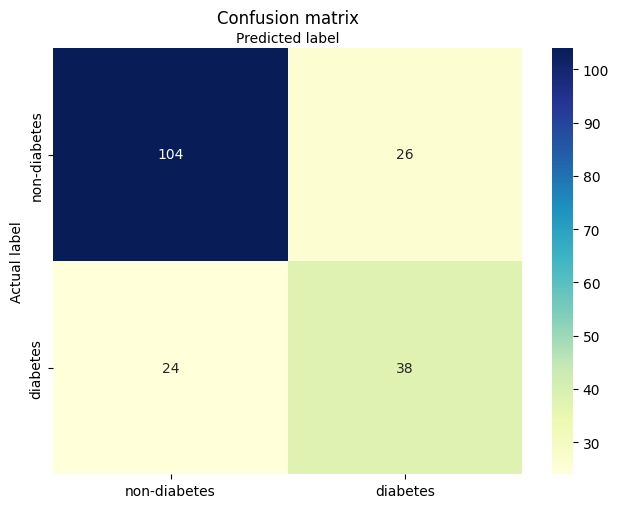

In [12]:
class_names=['non-diabetes','diabetes'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Confusion Matrix Evaluation Metrics
Let's evaluate the model using model evaluation metrics such as accuracy.

In [13]:
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8072916666666666


### 2. Multilabel Logistic Regression: The target variable has three or more nominal categories such as predicting the type of Wine.

## Load Iris Dataset
<img src="https://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png">
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the iris dataset.

In [14]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [15]:
# checking the unique values of targets
df['target'].unique() # there are three categories

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# convert categorical values to numeric
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["target"] = lb_make.fit_transform(df["target"])

In [18]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features]

# Separating out the target
y = df.loc[:,['target']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

In [21]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

c:\Users\RianL\ML-Project\Machine Learning\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
Y = []
for i in y_test.to_numpy():
    Y.append(i[0])
    
Y

[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0]

In [23]:
import numpy as np
accuracy = np.sum(y_pred == Y) / len(y_pred)

In [24]:
print("%s: %f" % ("The accuracy on test data is", accuracy))

The accuracy on test data is: 1.000000


In [25]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, Y)
cnf_matrix

array([[ 7,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  5]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

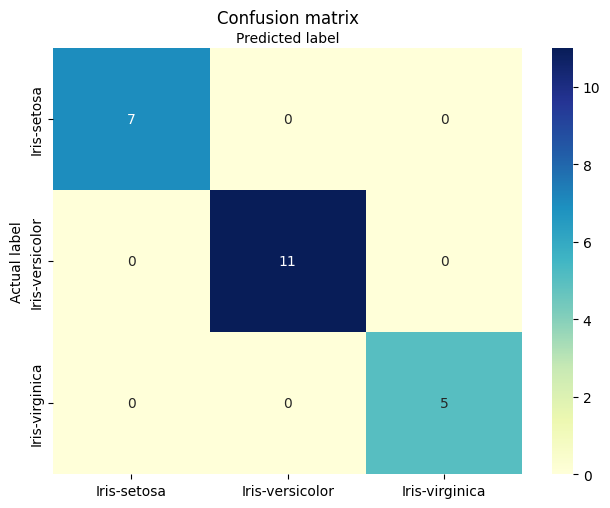

In [26]:
class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
# create heatmap
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu" ,fmt='d', xticklabels=class_names, yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')